In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob

In [2]:
# quitar nan

def NanOff(df):
    new = pd.DataFrame(df)
    new = new.replace(np.nan,'0')
    return new

In [3]:
DFrameArray = []
FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Databases/*.xls'):
        df = pd.read_excel(f,sheet_name='hoja1')
        df = NanOff(df) # TAKE OUT THE NAN ENTRIES
        
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index='True')
    
    return dft

In [4]:
# each element in DFrameArray is a dataframe for each section

# dft contains all the information of the group
dft = OneDataFrame()

In [5]:
print(FileNames)

['Databases/202110_10468_Lista de clase_16.xls', 'Databases/202110_39380_Lista de clase_17.xls', 'Databases/202110_39422_Lista de clase_19.xls', 'Databases/202110_39384_Lista de clase_18.xls']


In [7]:
# Uso de filtros por columna
#DFrameArray[0].filter(items=['ID','A1','A2'])
DFrameArray[0].filter(like='Nota',axis=1)


# Seleccion por filar
#DFrameArray[2].set_index('A1')

#print(DFrameArray[2].loc[0:3])
#print(DFrameArray[2].iloc[:,0:2])

#print(DFrameArray[0]['Nota1'])
print(dft['Nombre'])

0                   ESCOBAR TAMAYO, SOFIA
1          GALVIS CORREA, ANDRES FERNANDO
2                GOMEZ TOSCANO, ANA MARIA
3             IBARRA MUÑOZ, DAVID OCTAVIO
4        LEYTON LOPEZ, FERNANDA VALENTINA
5             LOPEZ MENDOZA, PEDRO ARTURO
6           MORENO SUAREZ, DORIS NATHALIA
7            SANCHEZ PAZOS, CAMILO ANDRES
8            VANEGAS ESCOBAR, JUAN FELIPE
9                 VERA ANAYA, MARIA PAULA
10           ZAMORA CORTES, DAVID ERNESTO
11             CARDENAS BARRAGAN, NATALIA
12             DIAZ CAMACHO, MIGUEL ANGEL
13                   FINO VILLAMIL, LAURA
14           GALINDO MORENO, PAULA ANDREA
15         GUAYARA ROBAYO, SANDRA VIVIANA
16             HERNANDEZ PEREZ, ELIZABETH
17                 MELO BARRERO, FEDERICO
18       PULIDO MARTINEZ, DIEGO ALEJANDRO
19        QUINTERO MERIÑO, MICHAEL ALONSO
20     RODRIGUEZ CEBALLOS, KIRPAL ANTONIO
21             VILLA BENAVIDES, ANA SOFIA
22          VILLABONA RODRIGUEZ, JONATHAN
23           AGUILAR ARDILA, SARA 

In [34]:
for i in range(0,4):
    mean = np.average(DFrameArray[i]['Nota1'])
    A1 = np.average(DFrameArray[i]['A1'])
    B1 = np.average(DFrameArray[i]['B1'])
    C1 = np.average(DFrameArray[i]['C1'])
    print(mean, A1, B1, C1)

(2.6739130434782608, 0.6000000000000001, 0.4652173913043478, 0.2652173913043478)
(3.5047619047619043, 0.6714285714285714, 0.523809523809524, 0.30952380952380953)
(3.3649999999999998, 0.6599999999999999, 0.5599999999999999, 0.225)
(3.6809523809523808, 0.7666666666666667, 0.5666666666666667, 0.29047619047619044)


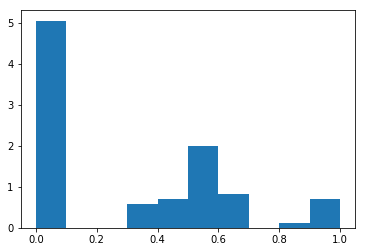

In [37]:
plt.hist(dft['C1'], density = True)
#plt.hist(DFrameArray[0]['Nota1'], density = True)
plt.show()

In [16]:
# Agregar columna

Sum = 0

for i in range(1,2):
    Sum += DFrameArray[0]['A'+str(i)]

dtest = DFrameArray[0].assign(NotaFinal=Sum.values)
print(dtest)

                                Nombre         ID  Nota1   A1   B1   C1 D1 E1  \
0                ESCOBAR TAMAYO, SOFIA  202021047    4.5  0.9  0.9  0.9  0  0   
1       GALVIS CORREA, ANDRES FERNANDO  201632930    4.0  0.8  0.7  0.5  0  0   
2             GOMEZ TOSCANO, ANA MARIA  202021204    2.0  0.6  0.2  0.0  0  0   
3          IBARRA MUÑOZ, DAVID OCTAVIO  202014446    3.0  0.6  0.7  0.3  0  0   
4     LEYTON LOPEZ, FERNANDA VALENTINA  202111884    2.5  0.6  0.6  0.4  0  0   
5          LOPEZ MENDOZA, PEDRO ARTURO  202025042    3.5  0.7  0.6  0.5  0  0   
6        MORENO SUAREZ, DORIS NATHALIA  201820035    1.5  0.6  0.0  0.0  0  0   
7         SANCHEZ PAZOS, CAMILO ANDRES  202113026    2.5  0.5  0.3  0.5  0  0   
8         VANEGAS ESCOBAR, JUAN FELIPE  202113279    2.0  0.3  0.5  0.5  0  0   
9              VERA ANAYA, MARIA PAULA  202113340    2.0  0.6  0.3  0.0  0  0   
10        ZAMORA CORTES, DAVID ERNESTO  202113407    1.5  0.3  0.3  0.0  0  0   
11          CARDENAS BARRAGA

In [26]:
# Mirar posicion
print(dtest.iat[0,1])
# Cambiar posicion
##dtest.iat[0,1] = 3.
#print(dtest)


# Agregar columna o fila 
#dtest.loc['Suma x columna'] = dtest.sum(axis=0)
#dtest.loc[:,'Suma x Renglon'] = dtest.sum(axis=1)
#print(dtest)

202021047


In [27]:
#Select the information by columns
for i in range(1,2):
    print(DFrameArray[2]['A'+str(i)])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: A1, dtype: object


In [ ]:
# Vamos a hacer corte

print(DFrameArray[2][DFrameArray[2]['A1']<0.7])
A1 = DFrameArray[2]['A1']
A1 = np.array(A1)
print(A1)

In [ ]:
# Plotting pies


sizes = DFrameArray[0]['A1'].value_counts()
print(sizes)
pie = DFrameArray[0]['A1'].value_counts().plot(kind='pie', shadow=True,\
                                              autopct='%1.1f%%', startangle=30,\
                                              radius=1.5,center=(0.5,0.5),\
                                              textprops={'fontsize':12},frame=False,\
                                              pctdistance=0.65)
pie.set_ylabel('')
pie.set_xlabel('')


labels=sizes.index.unique()
plt.gca().axis('equal')
plt.title(DFrameArray[0].columns[3], weight='bold',size=14)
plt.legend(labels, bbox_to_anchor=(0.,1.1))


plt.savefig('Figures/A1.pdf',dpi=100,bbox_inches='tight')


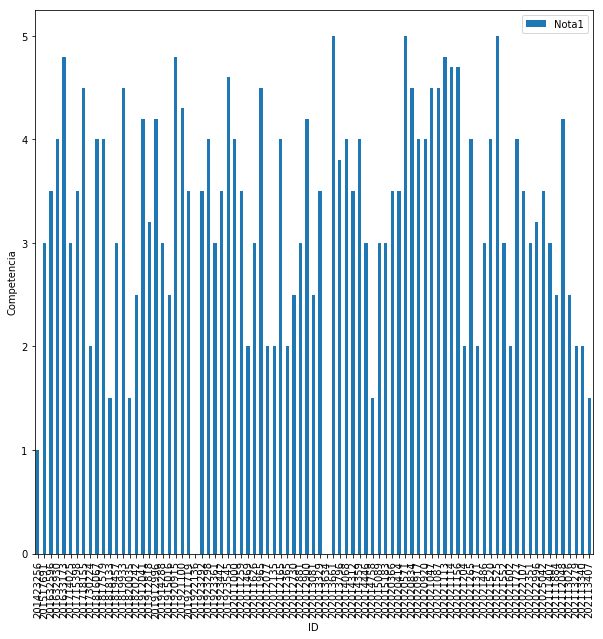

In [27]:
# plotting using group by

fig = plt.figure(figsize=(10,10))

dft.groupby('ID')['Nota1'].sum().plot(kind='bar',legend='Reverse')
#DFrameArray[1].groupby('Nota1')['A1'].sum().plot(kind='bar',legend='Reverse')

plt.xlabel('ID')
plt.ylabel('Competencia')
plt.savefig('Figures/A1Bars.pdf',dpi=100,bbox_inches='tight')

In [ ]:
fig = plt.figure()

DFrameArray[2].A2.groupby(DFrameArray[2].ID).sum().plot(kind='pie',cmap='viridis')
plt.axis('equal')
plt.ylabel('')
plt.savefig('Figures/A1Pie.pdf',dpi=100,bbox_inches='tight')

In [ ]:
#fig = plt.figure()
sns.lmplot(x='ID',y='A1',data=DFrameArray[2],fit_reg=False,hue='ID',legend=False,palette='viridis')
#plt.savefig('Figures/A1seaborn.pdf',dpi=100,bbox_inches='tight')

In [ ]:
#sns.set(style='ticks', color_codes=True)
#g = sns.pairplot(DFrameArray[2], hue='ID', palette='Spectral')

In [ ]:
print(dft['A2'])

In [ ]:
# Write the whole dataframe in an excel file


output = pd.ExcelWriter('DataBaseFisicaI.xls')
dft.to_excel(output,'Hoja1')
output.save()